In [80]:
import pandas as pd
import re

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data_dirty.csv', dtype={'text_list':object})
df.head(2)

,date,state,text_list
0,19 June 1991,Algeria,"['Algeria19 June 1991', 'In view of public dis..."
1,14 February 1992,Algeria,"['Algeria19 June 1991', 'In view of public dis..."


In [13]:
df.text_list = df.text_list.str.slice(start=2, stop=-2)
df.text_list = df['text_list'].str.split("\', \'")

In [38]:
df['text_str'] = df.text_list.str.join(',')

In [42]:
df.text_str[0]

'Algeria19 June 1991,In view of public disturbances and the threat of deterioration of the situation [...] a state of siege has been proclaimed, beginning at midnight in the night of 4/5 June 1991, for a period of four months throughout Algerian territory.,The Government of Algeria subsequently specified that these disturbances had been fomented with a view of preventing the general elections to be held on 27 June 1991 and to challenge the ongoing democratic process; and that in view of the insurrectional situation which threatened the stability of the institutions, the security of the people and their property, and the normal operation of the public services, it had been necessary to derogate from the provisions of articles 9 (3), 12 (1), 17, 19 (2) and 21 of the Covenant.,The said state of siege was terminated throughout Algeria on 29 September 1991.14 February 1992,(Dated 13 February 1992),In view of the serious threats to public order and the safety of individuals over the past few

In [67]:
re.findall(r"\d\d\d\d[,]", df.text_str[0])



['1991,', '1991,', '1992,', '1992,', '2011,']

In [4]:
df.loc[0,'date']

'19 June 1991'

In [70]:
df.text_str[0].find(df.loc[0, 'date'])

7

In [71]:
df.text_str[0].find(df.loc[1, 'date'])

863

In [73]:
df.text_str[0][df.text_str[0].find(df.loc[0, 'date']):df.text_str[0].find(df.loc[1, 'date'])]

'19 June 1991,In view of public disturbances and the threat of deterioration of the situation [...] a state of siege has been proclaimed, beginning at midnight in the night of 4/5 June 1991, for a period of four months throughout Algerian territory.,The Government of Algeria subsequently specified that these disturbances had been fomented with a view of preventing the general elections to be held on 27 June 1991 and to challenge the ongoing democratic process; and that in view of the insurrectional situation which threatened the stability of the institutions, the security of the people and their property, and the normal operation of the public services, it had been necessary to derogate from the provisions of articles 9 (3), 12 (1), 17, 19 (2) and 21 of the Covenant.,The said state of siege was terminated throughout Algeria on 29 September 1991.'

In [75]:
df.shape

(454, 4)

In [76]:
df.dtypes

date         object
state        object
text_list    object
text_str     object
dtype: object

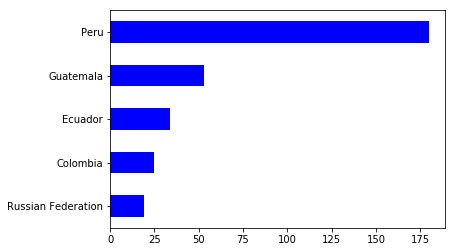

In [85]:
df.state.value_counts().head().sort_values().plot(kind='barh', color='Blue')